In [209]:
#importing required modules
import torch
import numpy as np
import matplotlib.pyplot as plt

In [210]:
#Our activation function
def unit_step_func(x):
  if(x>0):
    return 1
  else:
    return 0

##Data Generation

### The main reason we are generating our data set as parallel lines is so that we can have linearly seperable data and since they are parallel lines we can freely control the level of seprability(gamma)

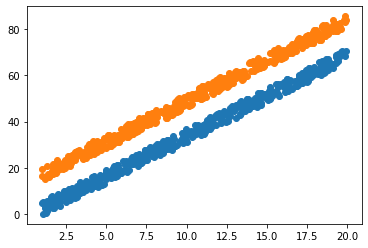

In [211]:
D1 = torch.empty(500,2).fill_(1)
D2 = torch.empty(500,2).fill_(1)

gamma = 12 ##Measure of Linear separatibilty

D3 = torch.FloatTensor(500,1).uniform_(1,20)
D4 = torch.FloatTensor(500,1).uniform_(1,20)
Y3 = 3.5*D3 + 0
Y4 = 3.5*D4 + gamma
Y3 = Y3 + torch.FloatTensor(500,1).uniform_(-4,2)
Y4  =Y4 + torch.FloatTensor(500,1).uniform_(-1,5)

D1[:,0] = D3[:,0]
D1[:,1] = Y3[:,0]

D2[:,0] = D4[:,0]
D2[:,1] = Y4[:,0]

plt.scatter(D3[:,0],Y3[:,0])
plt.scatter(D4[:,0],Y4[:,0])
plt.show()

#Combing the datasets
###Here we add our bias to the weight matrix itself so we can make our calculations easier.

In [212]:
#Adding the extra dimension to data to take care of bias 
X = torch.empty(1000,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2

#Creating the labels
Y = torch.empty(1000,1)
Y[::2,:2] = 1
Y[1::2,:2] = 0

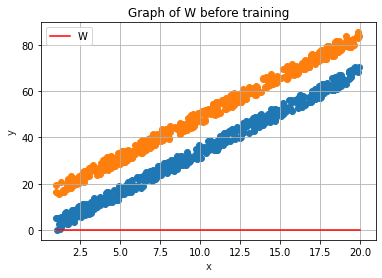

In [213]:
#plotting the graph before training 
x = np.linspace(1,20,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

#Perceptron Training Function

### If there is no change observed after an iteration then we break out our training.

In [214]:
#Training perceptron function
def train_perceptron(W,n_iters,learning_rate,X,y):
  iters = 0
  for _ in range(n_iters):
    number_of_changes = 0
    for idx, x_i in enumerate(X):
      s1 = np.dot(W,x_i)
      x1 = unit_step_func(s1)

      #Perceptron Update rule
      if(x1 != y[idx]):
        update = learning_rate * (y[idx] - x1)
        W += update * x_i
        number_of_changes +=1
    if(number_of_changes == 0):
      break
    iters += 1
  return W,iters

#Parameter Iniatilization

In [215]:
#Parameter Initialization
n_samples, n_features = X.shape
W = torch.rand(n_features)
bias = 0
n_iters = 1000
learning_rate = 0.0001

#Calling our main train perceptron Function

In [216]:
W,iters = train_perceptron(W,n_iters,learning_rate, X, Y)

In [217]:
#Printing Weights and biases
print(W)

tensor([ 0.4312, -0.1183,  0.4384])


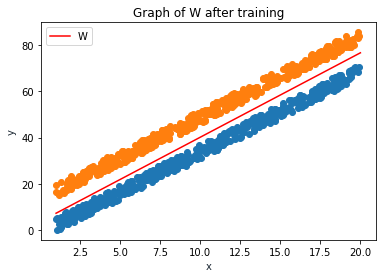

The no of iterations 1


In [218]:
#Graph of the data and classifier after training
x = np.linspace(1,20,100)
y1 = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y1, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.show()
print("The no of iterations {itersss}".format(itersss = iters))

#Analysis
With increase in gamma the perceptron can fastly learn the diffrences between the points and hence gets trained in less no of iterations.

The following graph illustrates the relation between the linear separibilty and no of iterations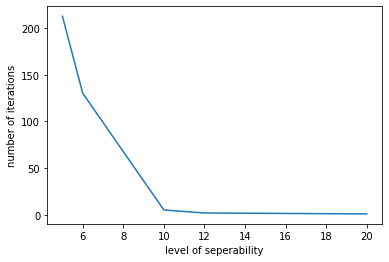